# Intro

Prof wants something like the below

<img src="img/goal.png">

### Imports

In [1]:
import numpy as np
import nibabel as nib
from functools import reduce
from scipy.signal import detrend

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Helper functions

In [2]:
def load(filepath):
    img = nib.load(filepath)
    data = img.get_fdata()
    return img, data

def get_signal(data, mask, new_shape):
    signal = np.multiply(data, mask[:, :, :, np.newaxis])
    signal = signal.reshape(new_shape)
    signal = signal[signal.max(axis=1) != signal.min(axis=1)]
    return detrend(signal, axis=1)

### Load data

In [3]:
rs, rs_data   = load("./inputs/rsfMRI_data.nii.gz")
gm, gm_data   = load("./inputs/gm_3mm_fnirt.nii.gz")
csf, csf_data = load("./inputs/csf_3mm_fnirt.nii.gz")
wm, wm_data   = load("./inputs/wm_3mm_fnirt.nii.gz")

fd  = open("./inputs/FD.1D", "r").readlines()
fd  = [float(e.replace("\n", "")) for e in fd]

### Plots

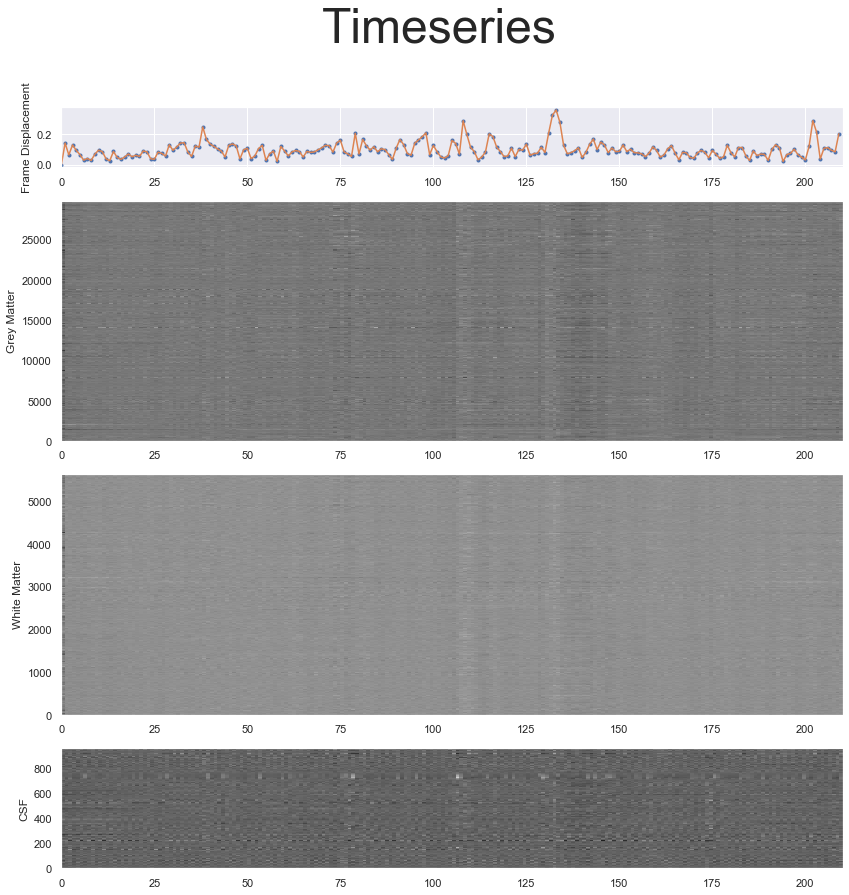

In [5]:
### Setup
num_voxels = reduce(lambda x, y: x*y, gm_data.shape)
num_vols   = rs_data.shape[-1] 
new_shape  = (num_voxels, num_vols)
fig, axarr = plt.subplots(4, 1, figsize=(14, 14), gridspec_kw={"height_ratios": [1, 4, 4, 2]})
fig.suptitle("Timeseries", fontsize=48)

### Plot frame displacement timeseries
axarr[0].plot(fd, ".")
axarr[0].plot(fd)
axarr[0].set_xlim([0, num_vols])
axarr[0].set_ylabel("Frame Displacement")

### Plot GM, WM, CSF timeseries
timeseries = zip([gm_data, wm_data, csf_data], ["Grey Matter", "White Matter", "CSF"])
for i, (mask_data, label) in enumerate(timeseries):
    signal = get_signal(rs_data, mask_data, new_shape)
    axarr[i+1].imshow(signal, extent=[0, num_vols, 0, signal.shape[0]], cmap="gist_gray", aspect="auto")
    axarr[i+1].set_ylabel(f"{label}")
    axarr[i+1].grid(None);